In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt
import matplotlib.pyplot as plt
import geosnap as gio
from geosnap import DataStore
from geosnap.io import get_census, get_acs, get_nces, store_acs
import libpysal as ps
from libpysal.weights import Queen
import contextily as cx

/opt/tljh/user/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/tljh/user/lib/python3.10/site-packages/quantecon/lss.py:20: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def simulate_linear_model(A, x0, v, ts_length):


In [2]:
sd_boundary = gpd.read_file("~/github/15-minute-analysis/15-minute-package/data/sd_boundary/san_diego_boundary_datasd.shp")

<Axes: >

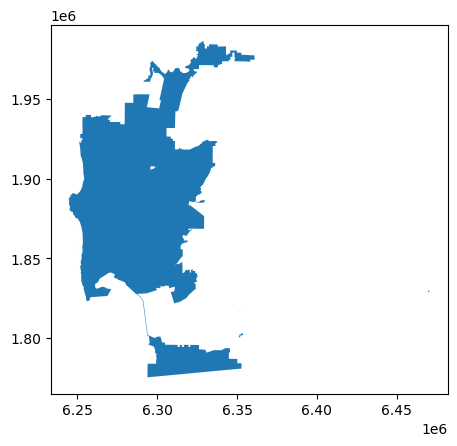

In [3]:
sd_boundary.plot()

In [4]:
#internet pull
#datasets = DataStore("data/geosnap/")

In [5]:
#demo = get_acs(datasets, county_fips='06073', years=[2021], level='tract')

In [6]:
sd_acs = gpd.read_parquet("data/acs_tracts/sd_acs.parquet")
sd_acs

,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,n_recent_immigrant_pop,...,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry,GEOID
GEOID,,,,,,,,,,,,,,,,,,,,,
06073000100,228.0,0.0,21.0,45.0,117.0,34.0,35.0,0.0,277.0,32.0,...,1.623816,0.304465,0.000000,1.082544,0.000000,1.116373,0.0,0.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947...",06073000100
06073000201,40.0,11.0,0.0,13.0,101.0,65.0,112.0,0.0,216.0,34.0,...,6.323084,2.771763,0.000000,4.677350,0.000000,0.909485,0.0,0.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779...",06073000201
06073000202,431.0,0.0,59.0,78.0,233.0,150.0,66.0,0.0,879.0,115.0,...,4.217016,0.000000,0.123305,3.699137,0.000000,1.331689,0.0,0.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838...",06073000202
06073000301,396.0,0.0,19.0,0.0,21.0,83.0,53.0,0.0,439.0,108.0,...,17.155556,0.622222,2.444444,16.311111,0.000000,4.888889,0.0,0.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684...",06073000301
06073000302,526.0,0.0,66.0,13.0,70.0,121.0,132.0,0.0,199.0,45.0,...,7.102672,1.265823,0.000000,4.887482,2.215190,3.059072,0.0,0.0,"MULTIPOLYGON (((-117.16400 32.74091, -117.1640...",06073000302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06073021900,2273.0,0.0,30.0,0.0,50.0,25.0,44.0,12.0,1004.0,273.0,...,21.531286,0.272056,4.236300,11.465216,0.000000,20.093276,0.0,0.0,"MULTIPOLYGON (((-117.13746 32.67843, -117.1354...",06073021900
06073022000,2015.0,0.0,151.0,0.0,8.0,5.0,10.0,0.0,1833.0,434.0,...,8.651457,2.552519,0.903546,3.930427,0.542128,4.111136,0.0,0.0,"MULTIPOLYGON (((-117.09190 32.68388, -117.0916...",06073022000
06073022101,54.0,0.0,0.0,19.0,17.0,76.0,41.0,0.0,371.0,26.0,...,13.815789,0.000000,3.289474,8.245614,0.000000,0.000000,0.0,0.0,"MULTIPOLYGON (((-117.33371 33.14433, -117.3336...",06073022101


<Axes: >

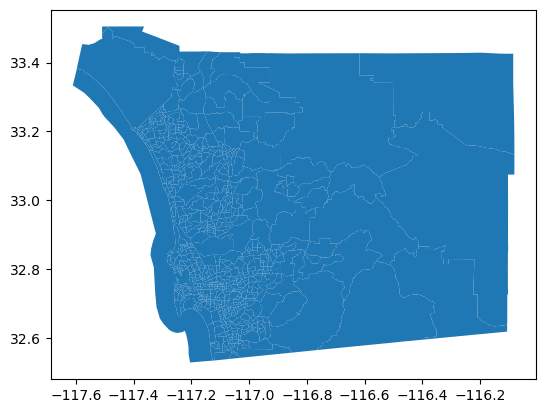

In [7]:
sd_acs.plot()

In [8]:
sd_boundary.crs

<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
sd_acs.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [10]:
sd_acs = sd_acs.to_crs(2230)

In [11]:
sd_demo = gpd.overlay(sd_boundary, sd_acs, how='identity')

/tmp/ipykernel_1726444/1087773748.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 3 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  sd_demo = gpd.overlay(sd_boundary, sd_acs, how='identity')


In [12]:
sd_demo

,objectid,code,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,...,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,GEOID,geometry
0,56.0,0.0,228.0,0.0,21.0,45.0,117.0,34.0,35.0,0.0,...,1.623816,0.304465,0.000000,1.082544,0.000000,1.116373,0.0,0.0,06073000100,"POLYGON ((6271212.508 1855074.386, 6271393.972..."
1,56.0,0.0,40.0,11.0,0.0,13.0,101.0,65.0,112.0,0.0,...,6.323084,2.771763,0.000000,4.677350,0.000000,0.909485,0.0,0.0,06073000201,"POLYGON ((6276375.410 1856718.155, 6276654.562..."
2,56.0,0.0,431.0,0.0,59.0,78.0,233.0,150.0,66.0,0.0,...,4.217016,0.000000,0.123305,3.699137,0.000000,1.331689,0.0,0.0,06073000202,"POLYGON ((6274535.866 1852524.707, 6274558.408..."
3,56.0,0.0,396.0,0.0,19.0,0.0,21.0,83.0,53.0,0.0,...,17.155556,0.622222,2.444444,16.311111,0.000000,4.888889,0.0,0.0,06073000301,"POLYGON ((6279287.227 1853533.698, 6279509.232..."
4,56.0,0.0,526.0,0.0,66.0,13.0,70.0,121.0,132.0,0.0,...,7.102672,1.265823,0.000000,4.887482,2.215190,3.059072,0.0,0.0,06073000302,"POLYGON ((6280617.190 1850738.841, 6280617.938..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,59.0,0.0,648.0,0.0,56.0,7.0,15.0,69.0,23.0,13.0,...,1.248439,0.624220,0.000000,1.217228,0.031211,0.405743,0.0,0.0,06073021304,"POLYGON ((6351851.468 1816896.781, 6351908.999..."
390,60.0,0.0,1981.0,25.0,0.0,0.0,56.0,0.0,85.0,0.0,...,0.584046,0.000000,0.000000,0.284900,0.000000,0.284900,0.0,0.0,06073013320,"POLYGON ((6351742.153 1800646.805, 6351738.500..."
391,60.0,0.0,2424.0,21.0,45.0,0.0,26.0,103.0,401.0,20.0,...,11.326087,0.391304,1.695652,9.543478,0.217391,6.304348,0.0,0.0,06073021302,"POLYGON ((6353380.524 1803110.309, 6353607.699..."
392,56.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((6311228.168 1777091.810, 63112..."


<Axes: >

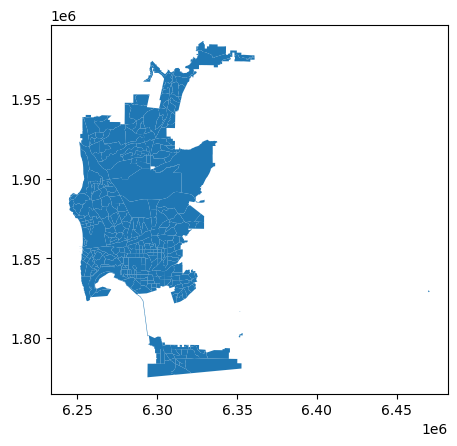

In [13]:
sd_demo.plot()

In [14]:
demo_queen = Queen.from_dataframe(sd_demo, use_index=False)

/opt/tljh/user/lib/python3.10/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 2 islands with ids: 326, 387.
  warnings.warn(message)


In [15]:
sd_demo['component'] = demo_queen.component_labels

In [16]:
sd_demo.component.value_counts()

component
0    387
3      3
4      2
1      1
2      1
Name: count, dtype: int64

In [17]:
sd_demo_WW = sd_demo

In [18]:
sd_demo_WW = sd_demo_WW.loc[sd_demo_WW['component'] == 0]

<Axes: >

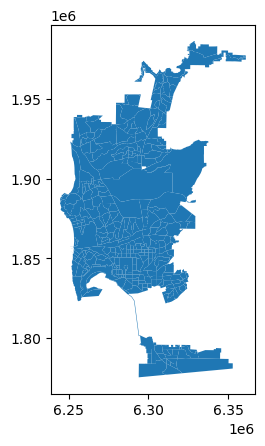

In [19]:
sd_demo_WW.plot()

<Axes: >

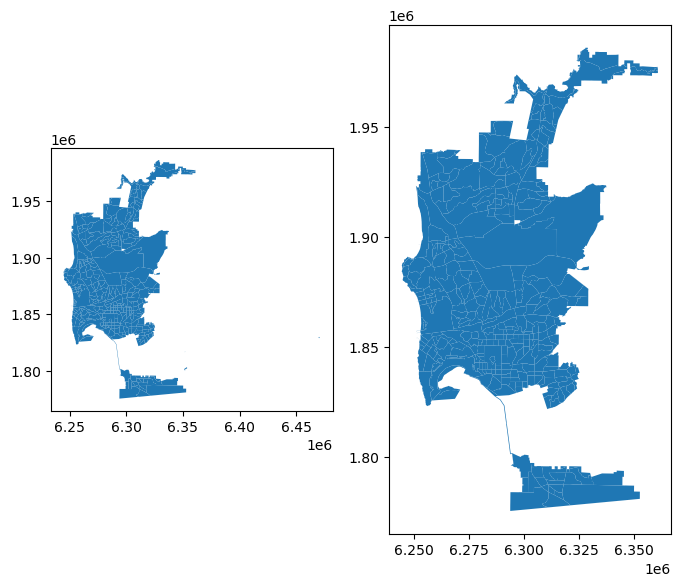

In [20]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(8,8))

sd_demo.plot(ax=ax[0])
sd_demo_WW.plot(ax=ax[1])

In [21]:
sd_demo.crs

<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [22]:
sd_demo['area'] = sd_demo['geometry'].area / 5280
sd_demo['area']

0      3.131855e+03
1      1.761806e+03
2      2.662464e+03
3      8.191048e+02
4      1.013142e+03
           ...     
389    6.947723e+00
390    4.487462e+02
391    9.485514e+01
392    5.798114e+01
393    1.141232e-14
Name: area, Length: 394, dtype: float64

In [23]:
sd_demo['pop_density'] = sd_demo['n_total_pop'] / sd_demo['area']
sd_demo['pop_density']

0        0.943849
1        1.310587
2        1.545936
3        2.746901
4        3.002540
          ...    
389    461.158258
390     15.703755
391     82.125232
392           NaN
393           NaN
Name: pop_density, Length: 394, dtype: float64

In [24]:
analysis_variables = ['n_total_pop', 'p_poverty_rate', 'median_household_income', 'per_capita_income', 
                      'p_nonhisp_white_persons', 'p_nonhisp_black_persons','p_hispanic_persons', 'p_asian_persons']

<Axes: >

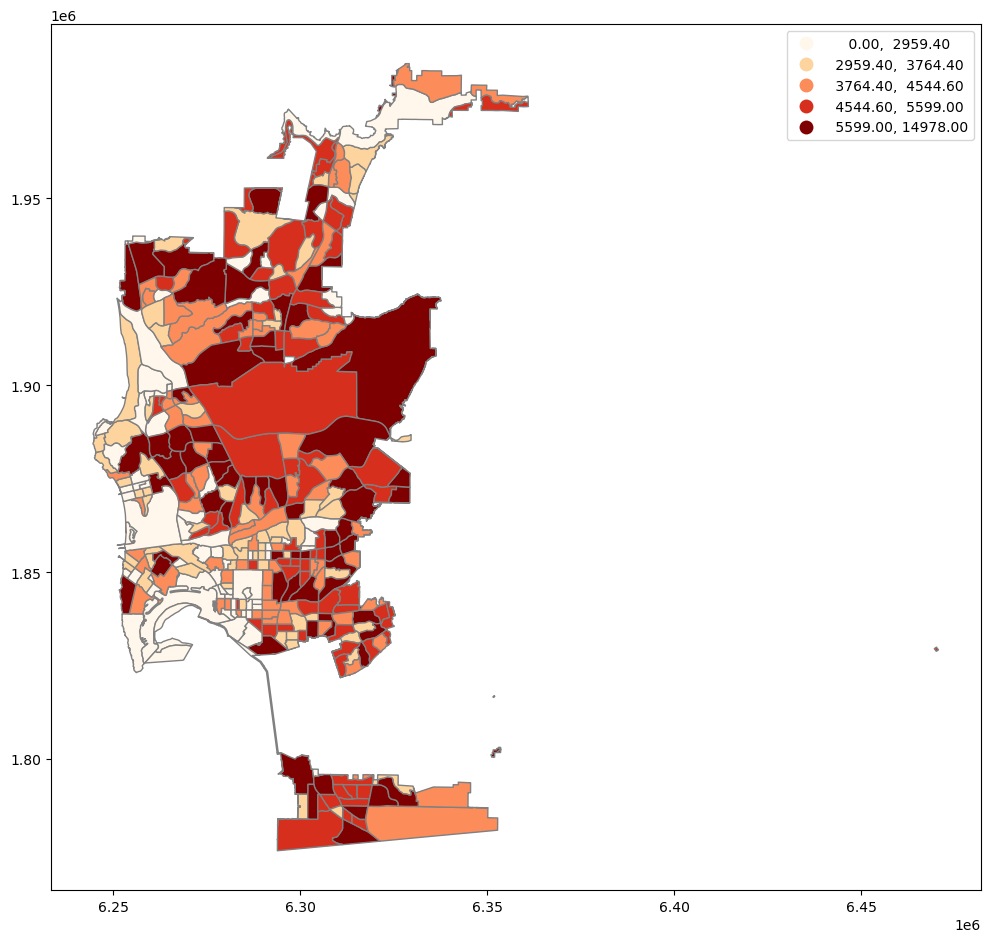

In [25]:
fig, ax = plt.subplots(figsize=(12, 12))

sd_demo.plot(column='n_total_pop', cmap='OrRd', scheme='quantiles', k=5, ax=ax, edgecolor='grey', legend=True)

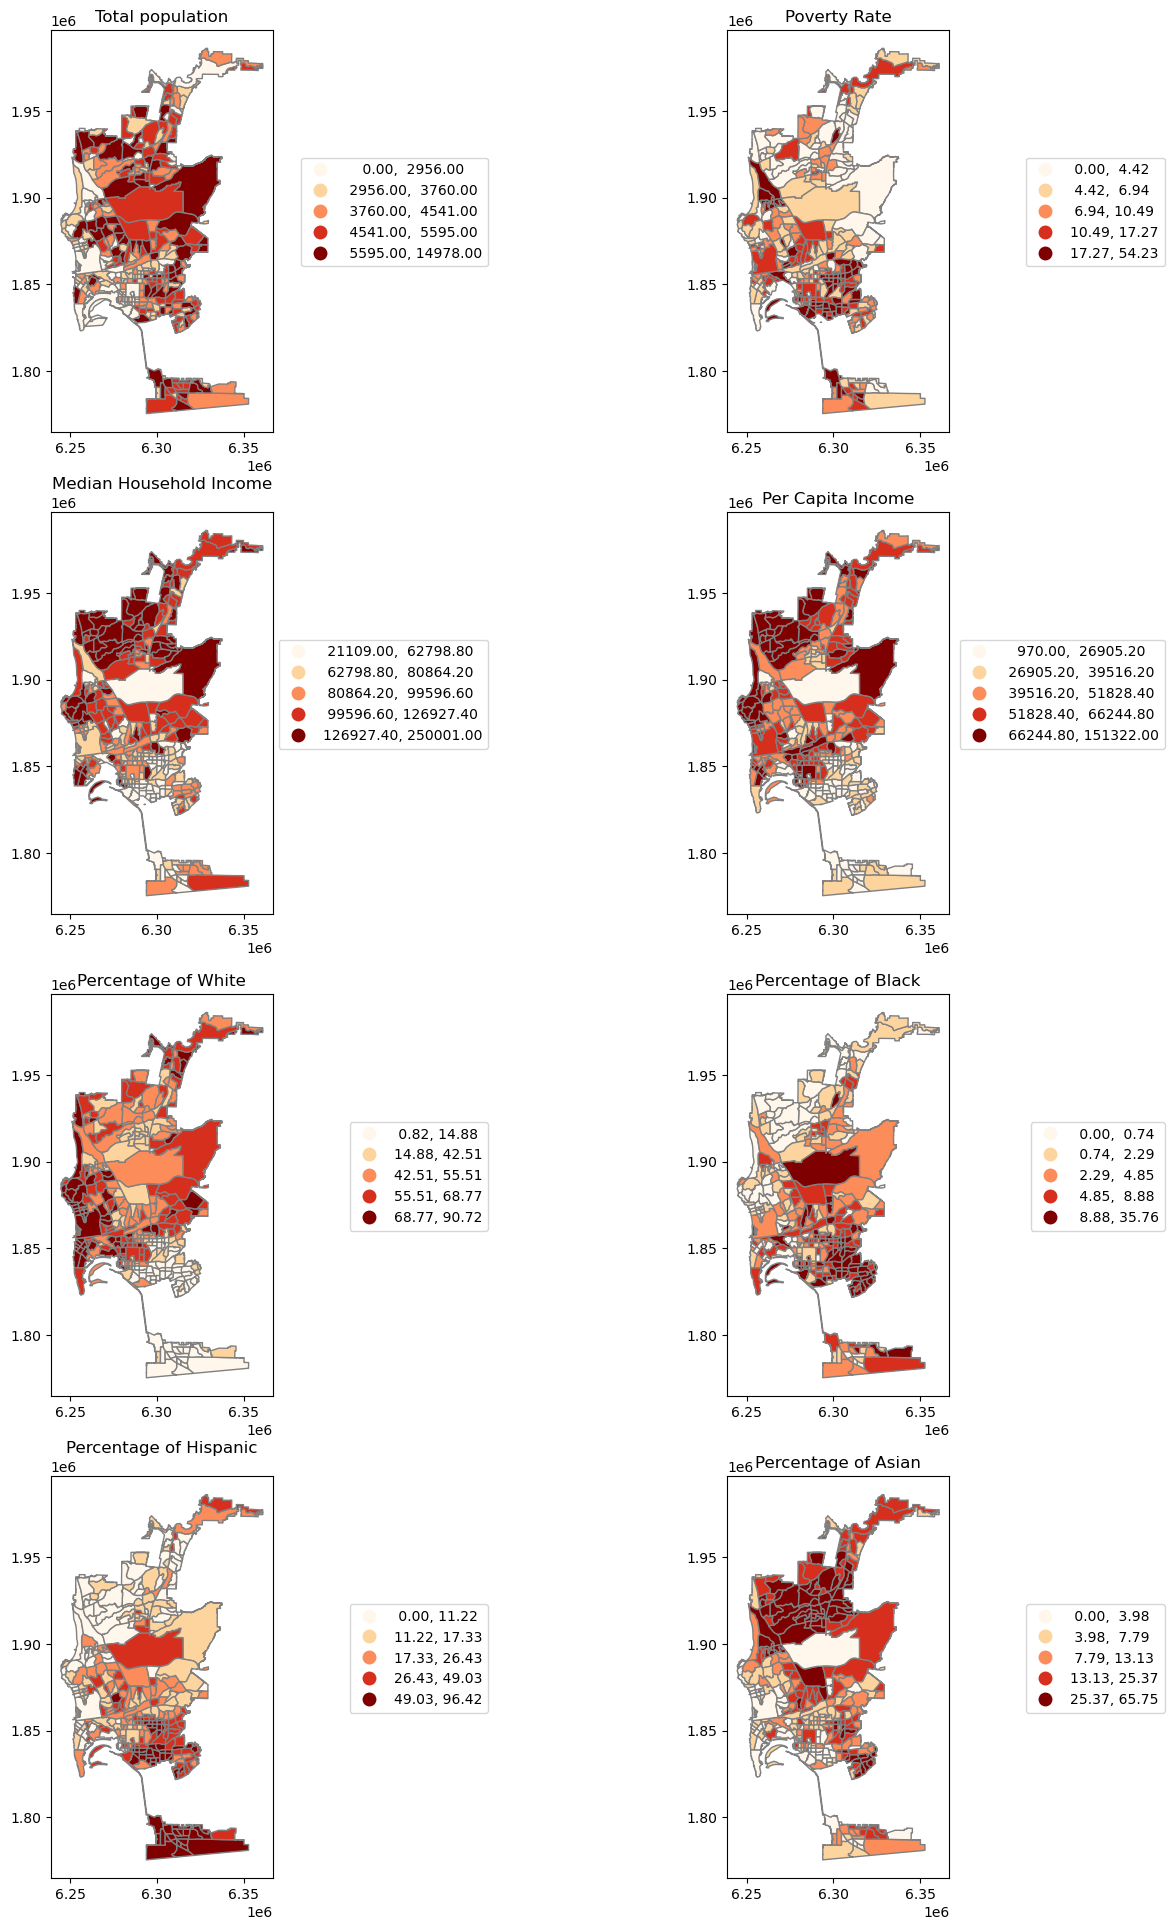

In [26]:
plot_titles = ['Total population', 'Poverty Rate', 'Median Household Income', 'Per Capita Income', 
                      'Percentage of White', 'Percentage of Black','Percentage of Hispanic', 'Percentage of Asian']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 24))
axs=axs.flatten()

for i, col in enumerate(analysis_variables):
    ax=axs[i]
    #sd_demo.plot(column='n_total_pop', cmap='OrRd', scheme='quantiles', k=5, ax=ax[0], edgecolor='grey', legend=True)
    sd_demo_WW.plot(column=col, cmap='OrRd', scheme='quantiles', k=5, ax=ax, edgecolor='grey', legend=True, legend_kwds={'bbox_to_anchor': (2, 0.7)})
    #ax.set_axis_off()
    ax.set_title(plot_titles[i])

plt.show()

<Axes: >

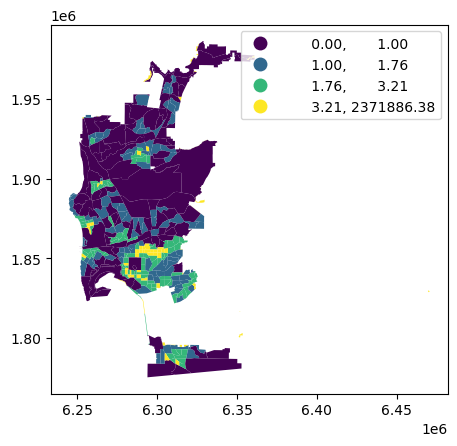

In [27]:
sd_demo.plot(column='pop_density', scheme='quantiles', k=4, legend=True)

In [28]:
dc_demo = gpd.read_parquet("data/acs_tracts/dc_acs.parquet")
dc_demo

,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,n_recent_immigrant_pop,...,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry,GEOID
GEOID,,,,,,,,,,,,,,,,,,,,,
11001000101,102.0,0.0,0.0,0.0,68.0,26.0,59.0,0.0,149.0,18.0,...,2.341920,0.000000,0.000000,2.341920,0.000000,2.341920,0.0,0.0,"MULTIPOLYGON (((-77.05714 38.91054, -77.05702 ...",11001000101
11001000102,134.0,0.0,0.0,68.0,56.0,14.0,146.0,0.0,746.0,124.0,...,6.724512,1.487450,1.456461,4.834211,0.000000,0.000000,0.0,0.0,"MULTIPOLYGON (((-77.06927 38.90058, -77.06871 ...",11001000102
11001000201,152.0,0.0,109.0,5.0,45.0,8.0,98.0,0.0,731.0,328.0,...,19.402985,0.000000,0.000000,16.417910,2.985075,0.000000,0.0,0.0,"MULTIPOLYGON (((-77.07927 38.91268, -77.07902 ...",11001000201
11001000202,42.0,46.0,58.0,61.0,91.0,56.0,220.0,0.0,793.0,202.0,...,12.948793,2.472042,0.000000,10.829900,0.588582,0.824014,0.0,0.0,"MULTIPOLYGON (((-77.07991 38.90507, -77.07989 ...",11001000202
11001000300,150.0,103.0,8.0,33.0,220.0,74.0,71.0,0.0,1308.0,207.0,...,13.308750,0.301710,0.201140,12.504190,0.000000,0.620181,0.0,0.0,"MULTIPOLYGON (((-77.08262 38.92120, -77.08256 ...",11001000300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11001010900,30.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,178.0,174.0,...,28.233352,3.082003,3.219593,1.403412,26.417171,0.247661,0.0,0.0,"MULTIPOLYGON (((-77.03919 38.80050, -77.03913 ...",11001010900
11001011001,0.0,9.0,51.0,0.0,0.0,13.0,19.0,0.0,126.0,15.0,...,2.683438,0.922432,0.000000,0.000000,0.922432,0.000000,0.0,0.0,"MULTIPOLYGON (((-77.01757 38.87646, -77.01675 ...",11001011001
11001011002,12.0,0.0,3.0,18.0,15.0,101.0,62.0,0.0,199.0,79.0,...,6.126617,3.335602,0.000000,6.126617,0.000000,0.000000,0.0,0.0,"MULTIPOLYGON (((-77.02188 38.87650, -77.02149 ...",11001011002


In [29]:
sd_demo.crs

<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [30]:
dc_demo.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

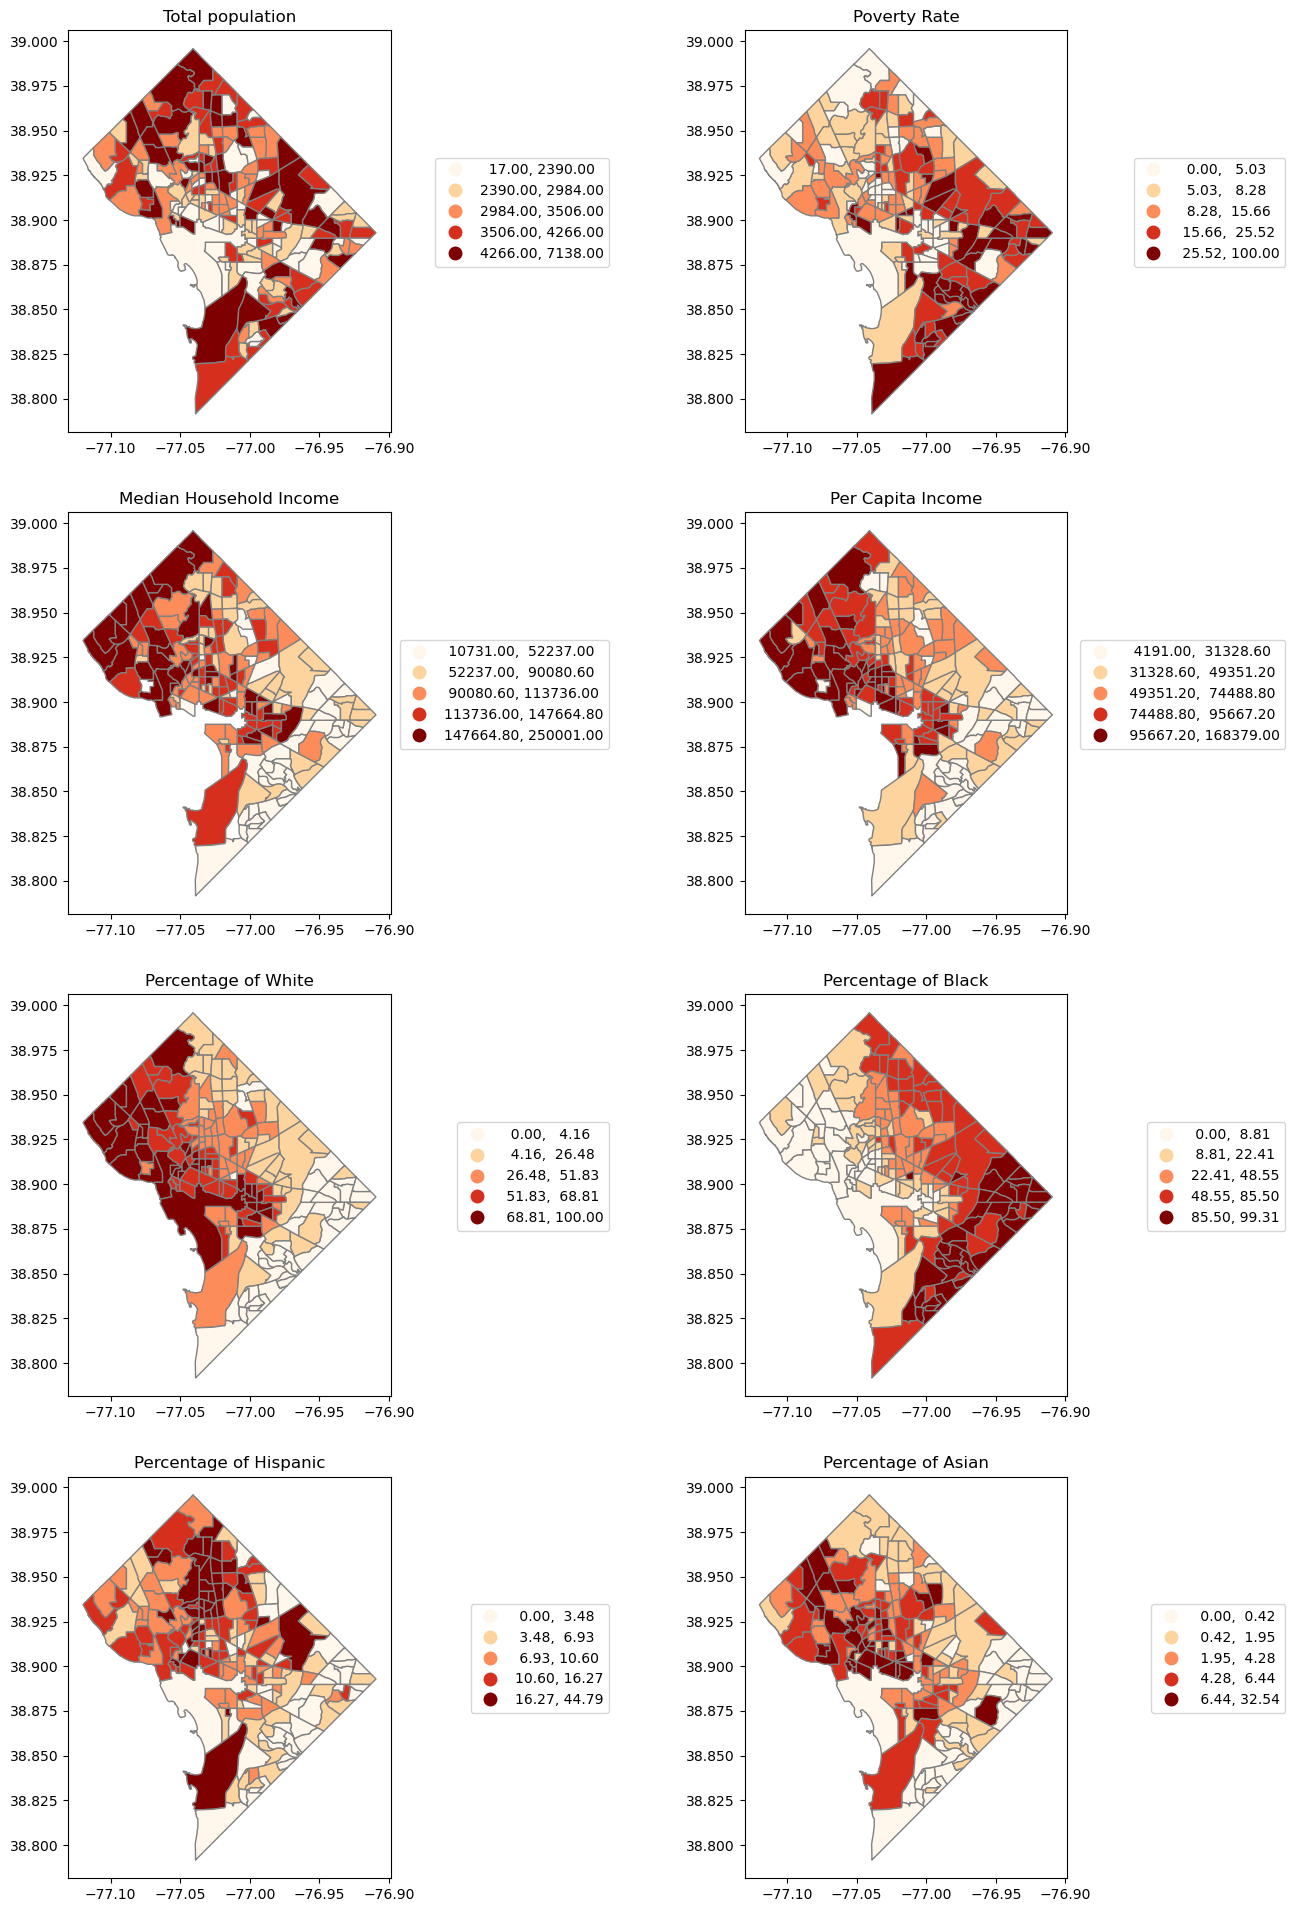

In [31]:
plot_titles = ['Total population', 'Poverty Rate', 'Median Household Income', 'Per Capita Income', 
                      'Percentage of White', 'Percentage of Black','Percentage of Hispanic', 'Percentage of Asian']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 24))
axs=axs.flatten()

for i, col in enumerate(analysis_variables):
    ax=axs[i]
    dc_demo.plot(column=col, cmap='OrRd', scheme='quantiles', k=5, ax=ax, edgecolor='grey', legend=True, legend_kwds={'bbox_to_anchor': (1.7, 0.7)})
    #ax.set_axis_off()
    ax.set_title(plot_titles[i])

plt.show()

In [32]:
dc_iso = gpd.read_file("data/dc_interpolation/dc_interpolation.shx")
dc_iso

,n_total_po,per_capita,p_nonhisp_,p_hispanic,p_nonhis_1,p_asian_pe,access,geometry
0,1.281000e+03,134915.000000,0.000000,13.973458,79.781421,2.576112,access,"POLYGON ((-77.05702 38.91055, -77.05666 38.910..."
1,1.681285e+03,161980.000000,0.991633,11.434769,81.158971,5.701890,access,"MULTIPOLYGON (((-77.06275 38.90231, -77.06275 ..."
2,3.817649e+03,4191.000000,7.338751,14.144236,51.828339,21.178263,access,"POLYGON ((-77.07902 38.91268, -77.07855 38.912..."
3,2.678122e+03,114134.000000,3.028249,8.949153,76.135593,9.152542,access,"MULTIPOLYGON (((-77.07263 38.90532, -77.07214 ..."
4,5.958477e+03,99617.994062,3.084143,14.817297,73.835061,4.207174,access,"POLYGON ((-77.08201 38.92152, -77.08182 38.921..."
...,...,...,...,...,...,...,...,...
311,2.303735e+03,73420.000000,33.165618,18.280922,42.599581,1.090147,no_access,"POLYGON ((-77.01675 38.87646, -77.01620 38.876..."
312,1.519000e+03,106678.000000,15.799868,4.937459,68.466096,4.476629,no_access,"POLYGON ((-77.02188 38.87650, -77.02149 38.877..."
313,2.873962e+03,39253.000000,65.446841,18.220339,12.654083,1.406009,no_access,"MULTIPOLYGON (((-76.96608 38.93397, -76.96583 ..."
314,1.328309e+01,0.000000,0.000000,0.000000,99.999994,0.000000,no_access,"MULTIPOLYGON (((-77.06463 38.89184, -77.06435 ..."


In [33]:
import matplotlib.pyplot as plt

In [34]:
#TO DO
#sd_isochrone = gpd.read_file("

<Axes: >

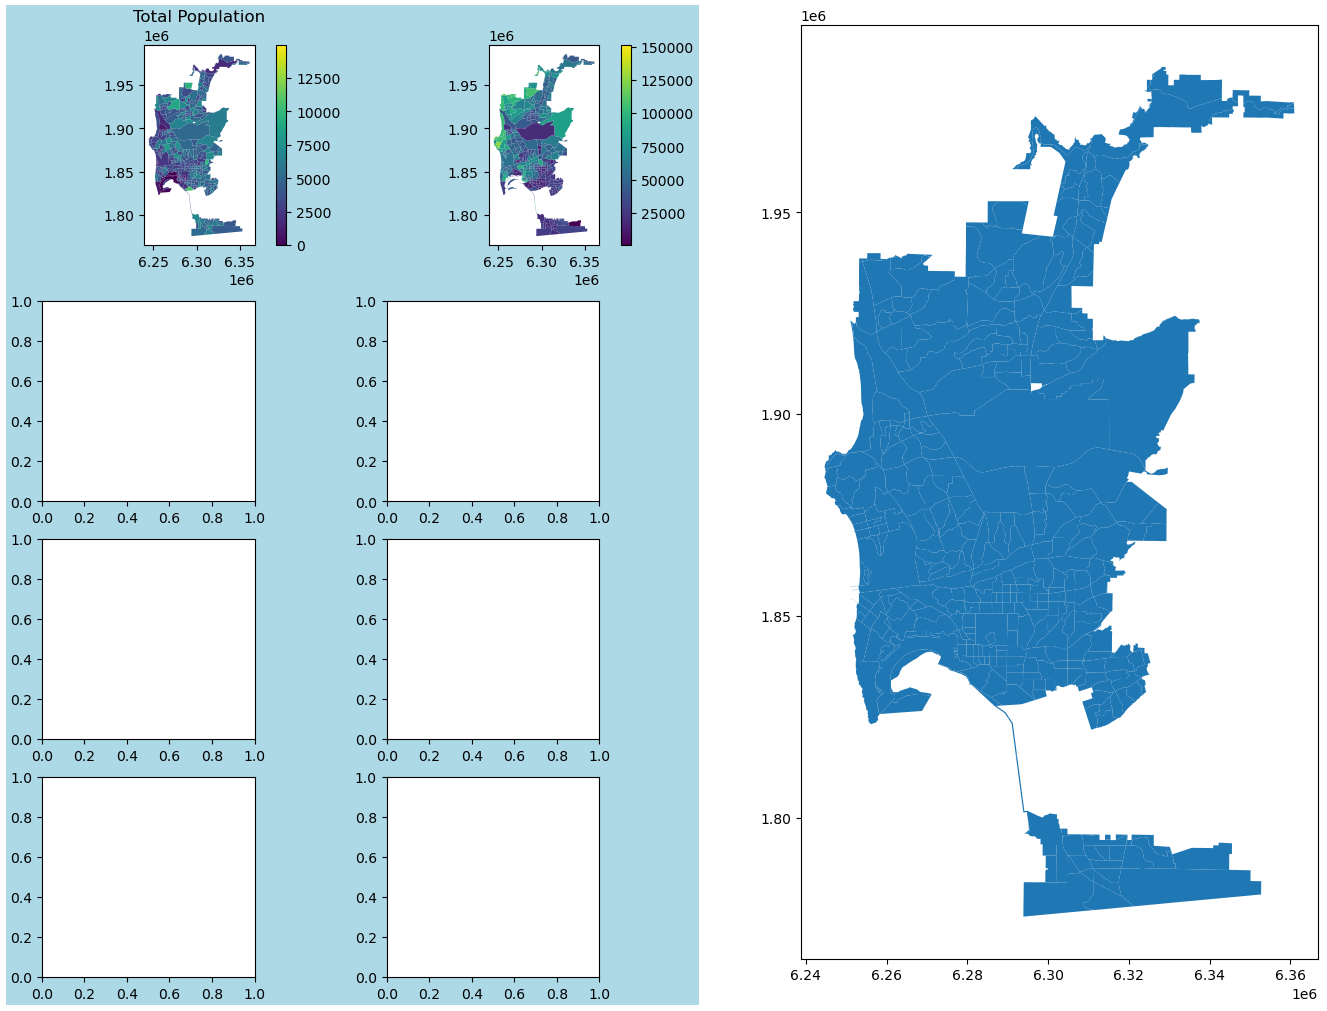

In [35]:
fig = plt.figure(figsize=(14,10), layout="constrained")
subfigs = fig.subfigures(1, 2, width_ratios=[1, 1])
axs0 = subfigs[0].subplots(4, 2)
subfigs[0].set_facecolor('lightblue')
sd_demo_WW.plot(ax=axs0[0, 0], column='n_total_pop', cmap='viridis', legend=True) 
axs0[0,0].set_title("Total Population")
sd_demo_WW.plot(ax=axs0[0, 1], column='per_capita_income', cmap='viridis', legend=True)  

axs1 = subfigs[1].subplots(1, 1)
sd_demo_WW.plot(ax=axs1)

In [36]:
dc_isochrone = gpd.read_file("data/dc_interpolation/dc_interpolation.shx")

In [37]:
dc_isochrone.head()

,n_total_po,per_capita,p_nonhisp_,p_hispanic,p_nonhis_1,p_asian_pe,access,geometry
0,1281.000000,134915.000000,0.000000,13.973458,79.781421,2.576112,access,"POLYGON ((-77.05702 38.91055, -77.05666 38.910..."
1,1681.284593,161980.000000,0.991633,11.434769,81.158971,5.701890,access,"MULTIPOLYGON (((-77.06275 38.90231, -77.06275 ..."
2,3817.649021,4191.000000,7.338751,14.144236,51.828339,21.178263,access,"POLYGON ((-77.07902 38.91268, -77.07855 38.912..."
3,2678.121534,114134.000000,3.028249,8.949153,76.135593,9.152542,access,"MULTIPOLYGON (((-77.07263 38.90532, -77.07214 ..."
4,5958.476543,99617.994062,3.084143,14.817297,73.835061,4.207174,access,"POLYGON ((-77.08201 38.92152, -77.08182 38.921..."


Text(0.5, 1.0, 'Access vs No Access')

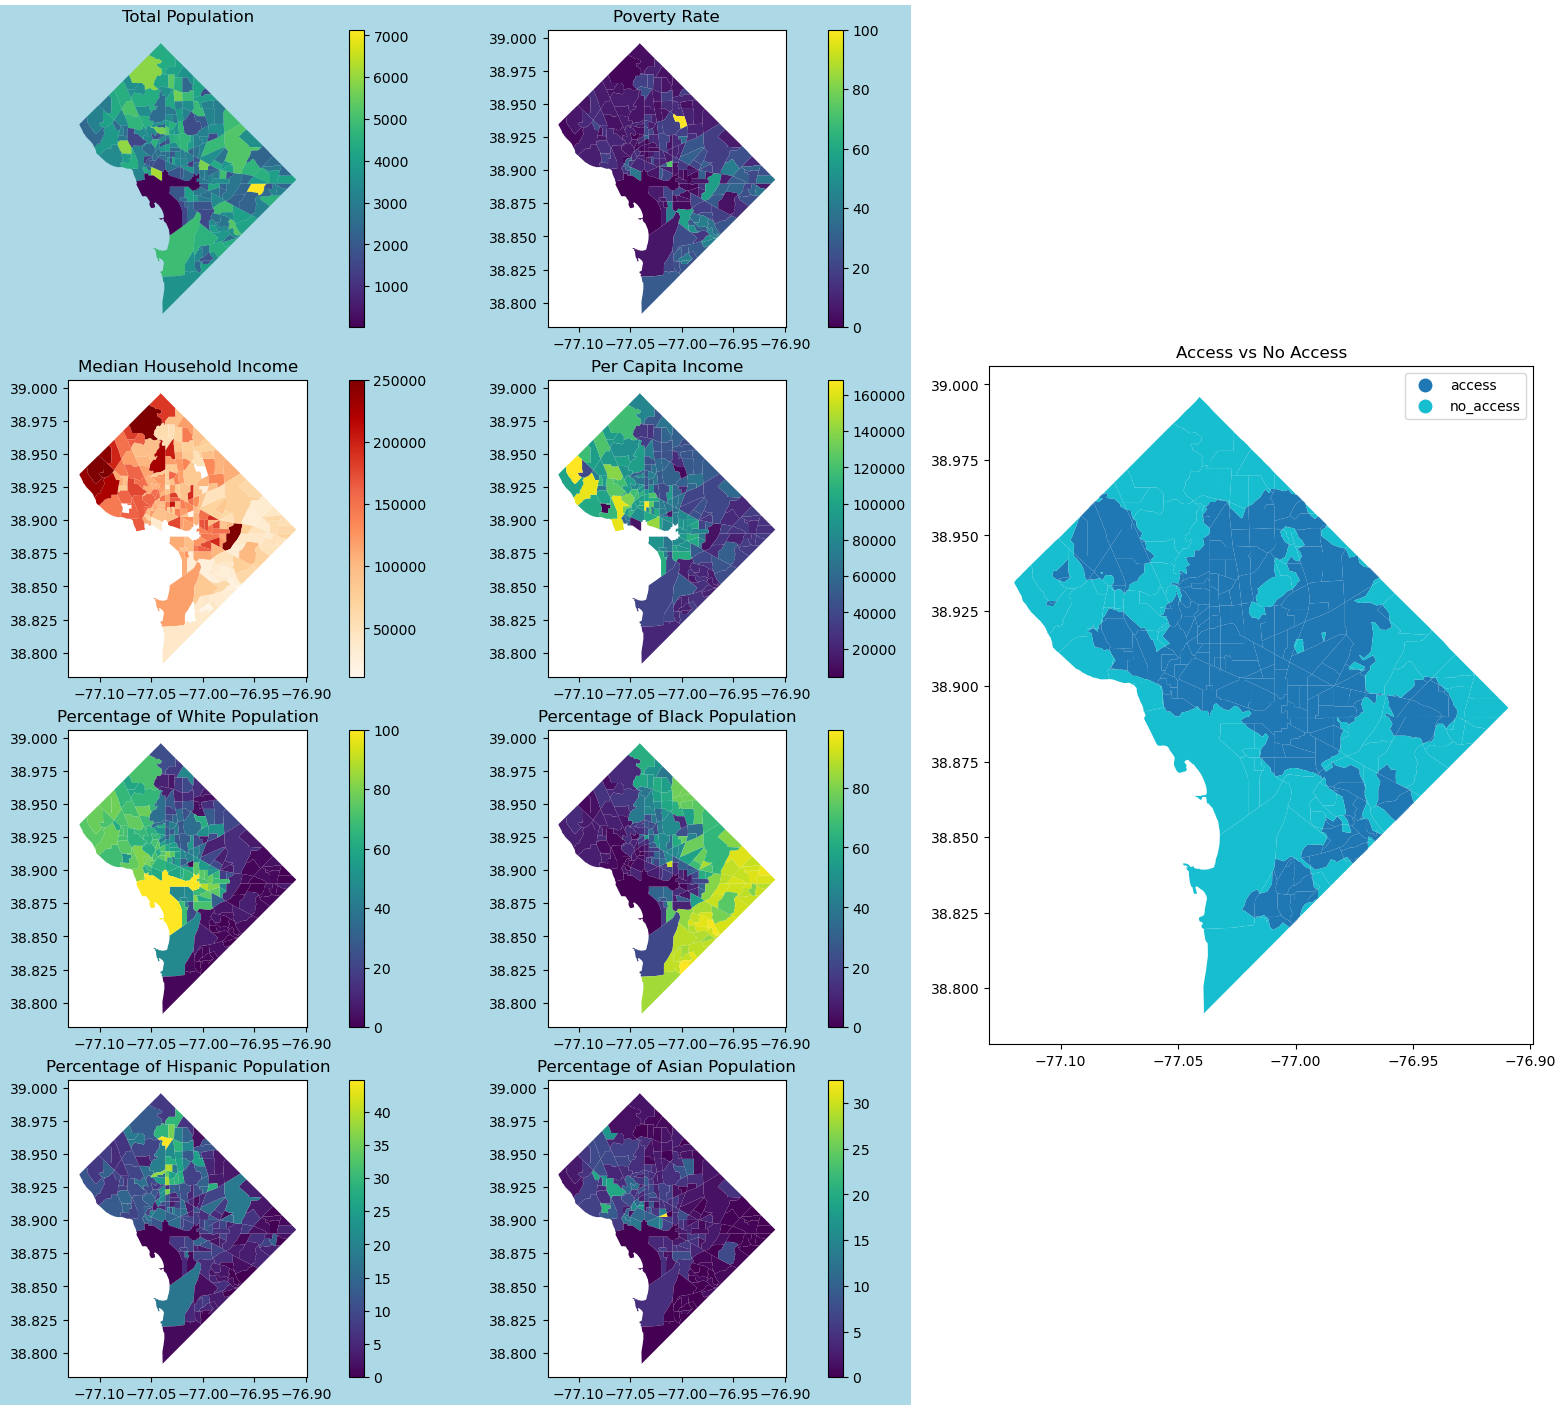

In [41]:
variables = ['n_total_pop', 'p_poverty_rate', 'median_household_income', 'per_capita_income', 
             'p_nonhisp_white_persons', 'p_nonhisp_black_persons','p_hispanic_persons', 'p_asian_persons']

titles = ['Total population', 'Poverty Rate', 'Median Household Income', 'Per Capita Income', 
               'Percentage of White', 'Percentage of Black','Percentage of Hispanic', 'Percentage of Asian']

fig = plt.figure(figsize=(16,14), layout="constrained")
subfigs = fig.subfigures(1, 2, width_ratios=[1.5, 1.])
axs0 = subfigs[0].subplots(4, 2)
subfigs[0].set_facecolor('lightblue')

dc_demo.plot(ax=axs0[0, 0], column='n_total_pop', cmap='viridis', legend=True) 
axs0[0,0].set_title("Total Population")
#axs0[0,0].axis('off')

dc_demo.plot(ax=axs0[0, 1], column='p_poverty_rate', cmap='viridis', legend=True)
axs0[0,1].set_title("Poverty Rate")

dc_demo.plot(ax=axs0[1, 0], column='median_household_income', cmap='OrRd', legend=True)
axs0[1,0].set_title('Median Household Income')

dc_demo.plot(ax=axs0[1, 1], column='per_capita_income', cmap='viridis', legend=True) 
axs0[1,1].set_title("Per Capita Income")

dc_demo.plot(ax=axs0[2, 0], column='p_nonhisp_white_persons', cmap='viridis', legend=True) 
axs0[2,0].set_title("Percentage of White Population")

dc_demo.plot(ax=axs0[2, 1], column='p_nonhisp_black_persons', cmap='viridis', legend=True) 
axs0[2,1].set_title("Percentage of Black Population")

dc_demo.plot(ax=axs0[3, 0], column='p_hispanic_persons', cmap='viridis', legend=True) 
axs0[3,0].set_title("Percentage of Hispanic Population")

dc_demo.plot(ax=axs0[3, 1], column='p_asian_persons', cmap='viridis', legend=True) 
axs0[3,1].set_title("Percentage of Asian Population")

axs1 = subfigs[1].subplots(1, 1)
dc_isochrone.plot(ax=axs1, column='access', legend=True)
axs1.set_title("Access vs No Access")

Text(0.5, 1.0, 'Access vs No Access')

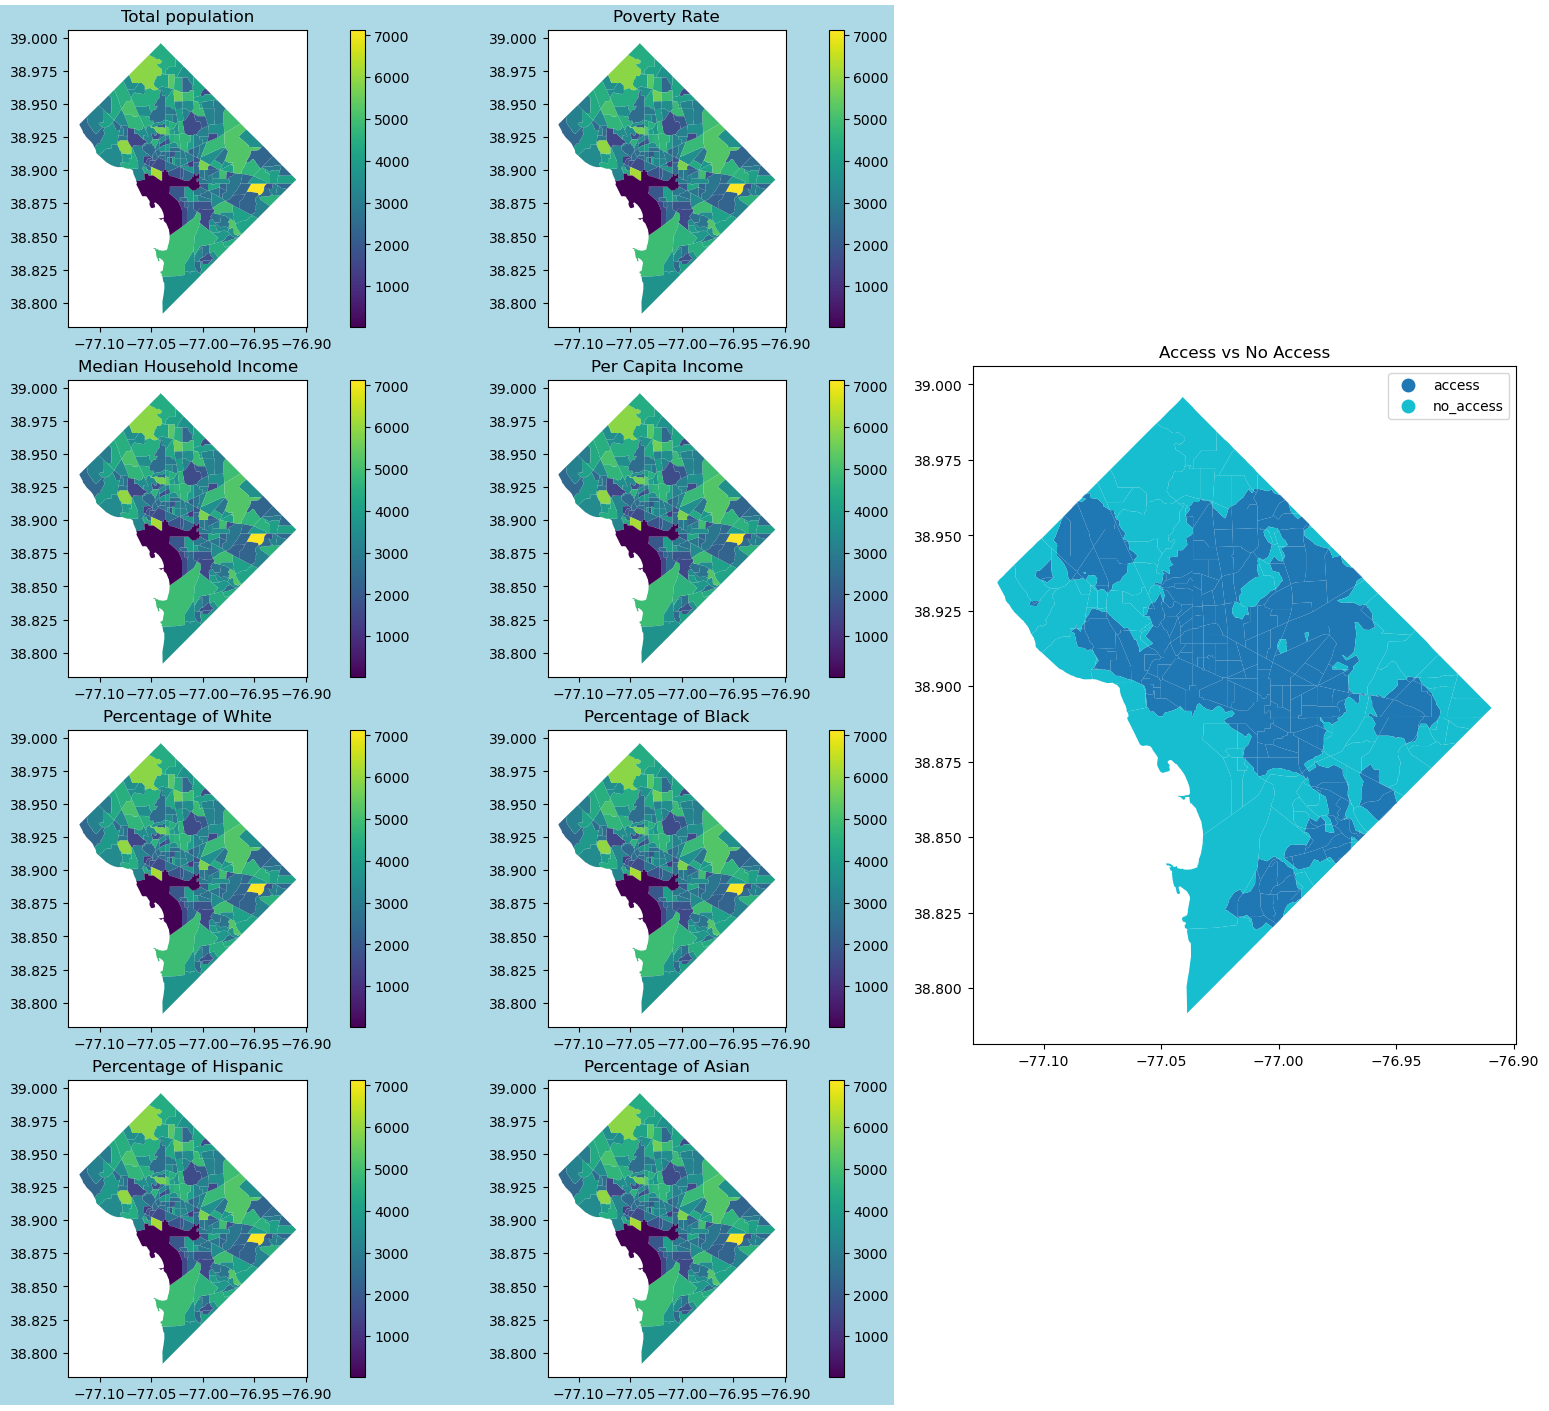

In [48]:
variables = ['n_total_pop', 'p_poverty_rate', 'median_household_income', 'per_capita_income', 
             'p_nonhisp_white_persons', 'p_nonhisp_black_persons','p_hispanic_persons', 'p_asian_persons']

titles = ['Total population', 'Poverty Rate', 'Median Household Income', 'Per Capita Income', 
               'Percentage of White', 'Percentage of Black','Percentage of Hispanic', 'Percentage of Asian']

fig = plt.figure(figsize=(16,14), layout="constrained")
subfigs = fig.subfigures(1, 2, width_ratios=[1.5, 1.])
axs0 = subfigs[0].subplots(4, 2)
subfigs[0].set_facecolor('lightblue')

index = 0
rows = 4
columns = 2

for i in range(rows):
    for j in range(columns):
        dc_demo.plot(ax=axs0[i, j], column=variables[type], cmap='viridis', legend=True) 
        axs0[i,j].set_title(titles[index])
        index += 1
        

axs1 = subfigs[1].subplots(1, 1)
dc_isochrone.plot(ax=axs1, column='access', legend=True)
axs1.set_title("Access vs No Access")

In [ ]:
fig = plt.figure(layout="constrained")

subfigs = fig.subfigures(1, 2, wspace=0.05, width_ratios=[1.5, 1.])

axs0 = subfigs[0].subplots(2, 2)
subfigs[0].set_facecolor('lightblue')
sd_demo.plot(ax=axs0[0, 1], column='n_total_pop', cmap='viridis', legend=True)  

axs1 = subfig[1].subplots(1, 1)


In [ ]:
neigh = gpd.read_file('~/15_Project/nei/cmty_plan_datasd.shx')

In [ ]:
sd_variables = gpd.GeoDataFrame(sd_demo[analysis_variables], geometry=sd_demo['geometry']) 
sd_variables

In [ ]:
sd_variables.crs

In [ ]:
neigh_overlay = gpd.sjoin(neigh, sd_variables, how='right', predicate='contains')
neigh_overlay

In [ ]:
neigh.plot()

In [ ]:
neigh_overlay.plot()